In [37]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from cost_aware_snpe_c import CostAwareSNPE_C
from sbi.inference.snpe.snpe_c import SNPE_C

import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
prior = utils.BoxUniform(low=torch.ones(1), high=1000 * torch.ones(1))

In [45]:
inference = CostAwareSNPE_C()

In [46]:
theta = torch.load("data/theta.pt")
x = torch.load("data/sim_data.pt")
obs_data = torch.load("data/obs_data.pt")
weights = torch.load("data/weights.pt")

In [47]:
density_estimator = inference.append_simulations(theta, x, proposal=None).append_weights(weights).train()

/Users/huangd5/anaconda3/lib/python3.9/site-packages/sbi/neural_nets/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 91 epochs.

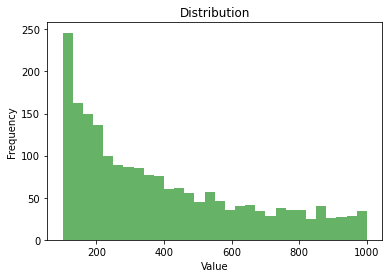

In [20]:
import matplotlib.pyplot as plt

plt.hist(theta.numpy(), bins=30, alpha=0.6, color='g')

plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

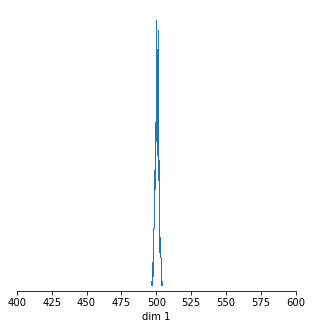

In [48]:
posterior = inference.build_posterior(density_estimator, prior=prior)

posterior_samples = posterior.sample((1000,), x=obs_data)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[400, 600]], figsize=(5, 5)
)

In [32]:
inference_uniform = SNPE_C()

In [33]:
theta_uniform = torch.load("data/theta_uniform.pt")
x_uniform = torch.load("data/sim_data_uniform.pt")

In [34]:
density_estimator_uniform = inference_uniform.append_simulations(theta_uniform, x_uniform).train()
posterior_uniform = inference_uniform.build_posterior(density_estimator_uniform, prior=prior)

/Users/huangd5/anaconda3/lib/python3.9/site-packages/sbi/neural_nets/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  warn("In one-dimensional output space, this flow is limited to Gaussians")


 Neural network successfully converged after 84 epochs.

In [35]:
posterior_samples_uniform = posterior_uniform.sample((1000,), x=obs_data)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

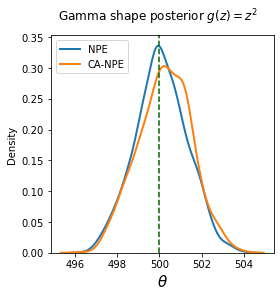

In [51]:
fig, axes = plt.subplots(1, figsize=(4, 4))
fig.suptitle('Gamma shape posterior $g(z) = z^2$')

sns.kdeplot(posterior_samples_uniform[:,0], color = "C0", linewidth = 2, linestyle = "solid", label = "NPE")
sns.kdeplot(posterior_samples[:,0], color = "C1", linewidth = 2, linestyle = "solid", label = "CA-NPE")
axes.set_xlabel("$\\theta$", fontsize = 15)
axes.axvline(500, color = "darkgreen", linestyle = "dashed")
plt.legend(loc = 'upper left', fontsize = 10)
# plt.show()
plt.savefig("cost_aware_npe.png")